Notebook for fitting the runtimes from the resource estimates.

Cambridge Consultants 2024\
Walden Killick

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
# Data from the resource estimator
x_matrix_sizes = [4, 8, 16, 32, 64, 128, 256]
y_runtimes = [0.106, 0.209, 0.590, 1, 4, 8,  15]

In [3]:
a_linear, b_linear = np.polyfit(x_matrix_sizes, y_runtimes, 1)
print(f"Runtime fit (linear): {a_linear:.3f}*x + {b_linear:.3f}")

Runtime fit (linear): 0.061*x + -0.276


In [4]:
def polylog(t: float, a: float, b: float, c: float, d: float) -> float:
    """Compute the value of a*log(t)^3 + b*log(t)^2 + c*log(t) + d.

    Parameters
    ----------
    t : float
        Argument for the logarithms.
    a : float
        log(t)^3 coefficient.
    b : float
        log(t)^2 coefficient.
    c : float
        log(t) coefficient.
    d : float
        Constant.

    Returns
    -------
    float
        Value of the polylogarithmic function.
    """
    return a*np.log(t)**3 + b*np.log(t)**2 + c*np.log(t) + d

In [5]:
popt, pcov = scipy.optimize.curve_fit(
    lambda t,a,b,c,d: polylog(t,a,b,c,d),  x_matrix_sizes,  y_runtimes,  p0=(0.1,0,0,-1)
    )
print(f"Runtime fit (polylogarithmic): {popt[0]:.3f}*log(x)^3 + {popt[1]:.3f}*log(x)^2 + {popt[2]:.3f}*log(x) + {popt[3]:.3f}")

Runtime fit (polylogarithmic): 0.308*log(x)^3 + -1.772*log(x)^2 + 3.424*log(x) + -2.034


In [6]:
x = np.linspace(4, 256, 100)
y_runtimes_fit_linear = [a_linear*t + b_linear for t in x]
y_polylog_fit = [polylog(t, *popt) for t in x]

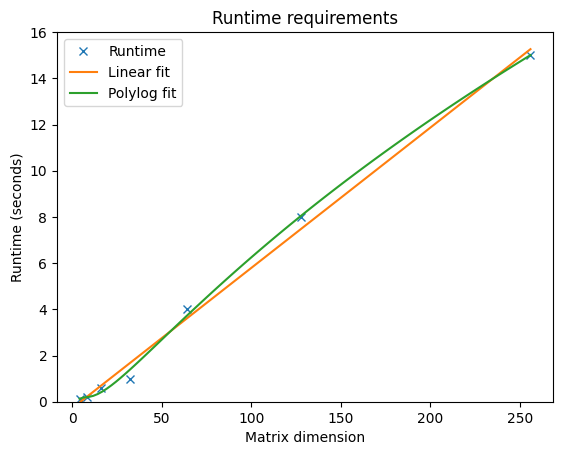

In [7]:
plt.plot(x_matrix_sizes, y_runtimes, 'x', label='Runtime')
plt.plot(x, y_runtimes_fit_linear, label='Linear fit')
plt.plot(x, y_polylog_fit, label='Polylog fit')
plt.xlabel('Matrix dimension')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime requirements')
plt.ylim([0, 16])
plt.legend()
plt.show()